<a href="https://colab.research.google.com/github/Pdeep666/ML/blob/main/DECISION_TREE_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
uploaded = files.upload()

Saving salaries (1).csv to salaries (1).csv


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv('salaries (1).csv')

In [6]:
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [7]:
df.shape

(16, 4)

In [10]:
df.isnull().sum()

,0
company,0
job,0
degree,0
salary_more_then_100k,0


In [13]:
input=df.drop('salary_more_then_100k',axis=1)
target=df['salary_more_then_100k']

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
new_comp=LabelEncoder()
new_job=LabelEncoder()
new_degree=LabelEncoder()

In [17]:
input['comp_new']=new_comp.fit_transform(input['company'])
input['job_new']=new_comp.fit_transform(input['job'])
input['degree_new']=new_degree.fit_transform(input['degree'])

In [18]:
input

,company,job,degree,comp_new,job_new,degree_new
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [27]:
# google as 2, abc pharma as 0 and facebook as 1
# sales executive 2, business manager 0, computer programmer 1
# bachelors as 0, masters as 1

In [23]:
input_new=input.drop(columns=['company','job','degree'],axis='columns')

In [24]:
input_new

,comp_new,job_new,degree_new
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [25]:
target

,salary_more_then_100k
0,0
1,0
2,1
3,1
4,0
5,1
6,0
7,0
8,0
9,1


In [32]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [33]:
model=tree.DecisionTreeClassifier()

In [34]:
model.fit(input_new,target)

DecisionTreeClassifier()

[Text(0.45454545454545453, 0.9166666666666666, 'x[0] <= 0.5\ngini = 0.469\nsamples = 16\nvalue = [6, 10]'),
 Text(0.2727272727272727, 0.75, 'x[1] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.36363636363636365, 0.8333333333333333, 'True  '),
 Text(0.18181818181818182, 0.5833333333333334, 'x[2] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.09090909090909091, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.2727272727272727, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.36363636363636365, 0.5833333333333334, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.6363636363636364, 0.75, 'x[0] <= 1.5\ngini = 0.375\nsamples = 12\nvalue = [3, 9]'),
 Text(0.5454545454545454, 0.8333333333333333, '  False'),
 Text(0.5454545454545454, 0.5833333333333334, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.7272727272727273, 0.5833333333333334, 'x[1] <= 0.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.6363636363636364

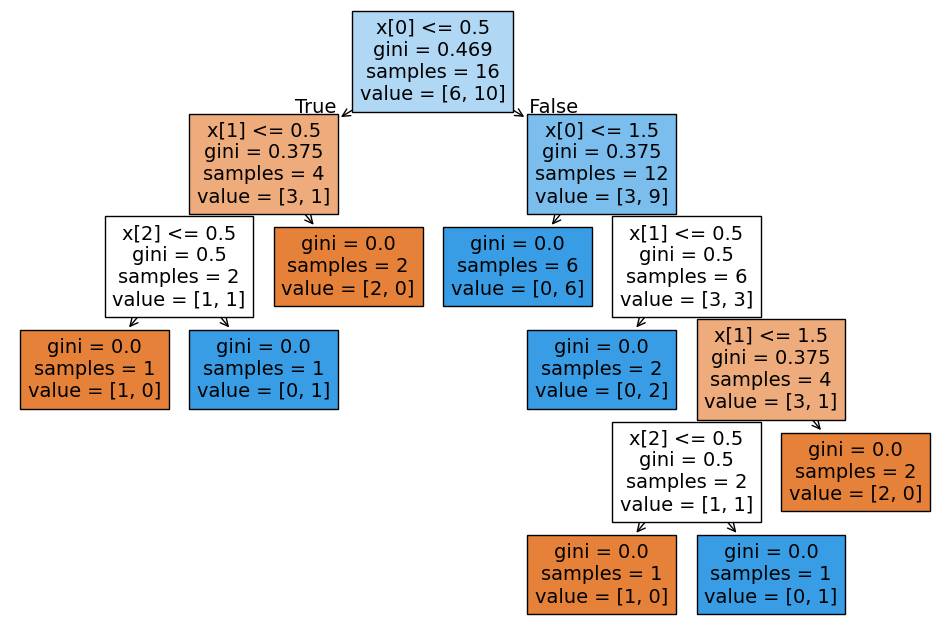

In [36]:
plt.figure(figsize=(12,8))
plot_tree(model,filled=True)


In [37]:
from sklearn.metrics import accuracy_score, classification_report

In [41]:
pred=model.predict(input_new)

In [42]:
print(accuracy_score(pred,target))

1.0


In [43]:
print(classification_report(pred,target))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        10

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



In [45]:
#Is salary of Google, Computer Engineer, Bachelors degree > 100 k ?
print(model.predict([[2,1,0]]))

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [46]:
# SO THE SALARY IS NOT MORE THAN 100K